# Sentiment Analysis

In [2]:
import tweepy
import textblob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [3]:
all_keys = open('Twitter_api.txt','r').read().splitlines()

In [4]:
api_key = all_keys[0]


In [5]:
api_key_secret = all_keys[1]

In [6]:
access_token = all_keys[2]

In [7]:
access_token_secret = all_keys[3]

In [8]:
authenticator = tweepy.OAuthHandler(api_key,api_key_secret)

In [9]:
authenticator.set_access_token(access_token,access_token_secret)

In [10]:
api = tweepy.API(authenticator,wait_on_rate_limit=True)

In [19]:
stock_market= 'Dogecoin'

In [20]:
search = f'#{stock_market} -filter:retweets'

In [21]:
start = "2021-07-06"
end = "2021-07-09"

In [22]:
tweet_cursor = tweepy.Cursor(api.search, q=search, lang='en',until = end, since= start, tweet_mode='extended' ).items(100)

In [23]:
tweets = [tweet.full_text for tweet in tweet_cursor]

In [24]:
tweet_df = pd.DataFrame(tweets, columns=['Tweets'])

In [25]:
tweet_df.head(60)

,Tweets
0,The current value of 1 DOGE in USD is: $0.2076...
1,If #dogecoin goes under .20 \nMe 👇 https://t....
2,Whoa this could be HUUUUGE for $JEJU #Jejudoge...
3,@_Baby_Corgi_ Awesome project &amp; I am prou...
4,@elonmusk Can we get the side cameras to autom...
5,Who thinks #Dogecoin will hit $1 before years ...
6,#Cryptocurrency is still a speculative investm...
7,$DOGE #Dogecoin #Doggos4Doge https://t.co/Hzwt...
8,$DOGE Update❗️❗️❗️\n\nCheckout the link in bio...
9,@elonmusk movie about #dogecoin gaslit us!! #d...


In [18]:
for _, row in  tweet_df.iterrows():
    row['Tweets'] = re.sub('http\S+','',row['Tweets'])
    row['Tweets'] = re.sub('#\S+','',row['Tweets'])
    row['Tweets'] = re.sub('@\S+','',row['Tweets'])
    row['Tweets'] = re.sub('\\n','',row['Tweets'])

In [62]:
tweet_df.head(60)

,Tweets,Polarity,Results
0,Let’s talk price action and anything else!,0.125000,+
1,Domain for sale: DM offer,0.000000,-
2,Weekly Initial Unemployment Claims increase to...,0.000000,-
3,I found in a User vault at this location! Joi...,1.000000,+
4,will HiT 27000 Mark in Next 15 Trading sessio...,0.000000,-
5,“It’s a small price to pay for a decentralized...,-0.250000,-
6,"Register and get 500 BRMT coins, join the soci...",0.016667,+
7,This project looks very interesting. I am int...,0.550000,+
8,Whoa this could be HUUUUGE for $JEJU This is ...,0.293750,+
9,"This project has a very bright future, because...",0.487857,+


In [52]:
tweet_df['Polarity'] = tweet_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [54]:
tweet_df.head(60)

,Tweets,Polarity
0,Let’s talk price action and anything else!,0.125000
1,Domain for sale: DM offer,0.000000
2,Weekly Initial Unemployment Claims increase to...,0.000000
3,I found in a User vault at this location! Joi...,1.000000
4,will HiT 27000 Mark in Next 15 Trading sessio...,0.000000
5,“It’s a small price to pay for a decentralized...,-0.250000
6,"Register and get 500 BRMT coins, join the soci...",0.016667
7,This project looks very interesting. I am int...,0.550000
8,Whoa this could be HUUUUGE for $JEJU This is ...,0.293750
9,"This project has a very bright future, because...",0.487857


In [55]:
tweet_df['Results'] = tweet_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [58]:
tweet_df.head(60)

,Tweets,Polarity,Results
0,Let’s talk price action and anything else!,0.125000,+
1,Domain for sale: DM offer,0.000000,-
2,Weekly Initial Unemployment Claims increase to...,0.000000,-
3,I found in a User vault at this location! Joi...,1.000000,+
4,will HiT 27000 Mark in Next 15 Trading sessio...,0.000000,-
5,“It’s a small price to pay for a decentralized...,-0.250000,-
6,"Register and get 500 BRMT coins, join the soci...",0.016667,+
7,This project looks very interesting. I am int...,0.550000,+
8,Whoa this could be HUUUUGE for $JEJU This is ...,0.293750,+
9,"This project has a very bright future, because...",0.487857,+


In [57]:
positive = tweet_df[tweet_df.Results=='+'].count()['Tweets']

In [63]:
negative = tweet_df[tweet_df.Results=='-'].count()['Tweets']

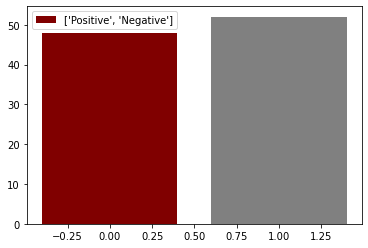

In [76]:
plt.bar([0,1], [positive, negative], label=["Positive","Negative"], color=['maroon',"grey"])
plt.legend()
plt.show()